In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import os
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
import nltk


Analyzing themes for CBE...


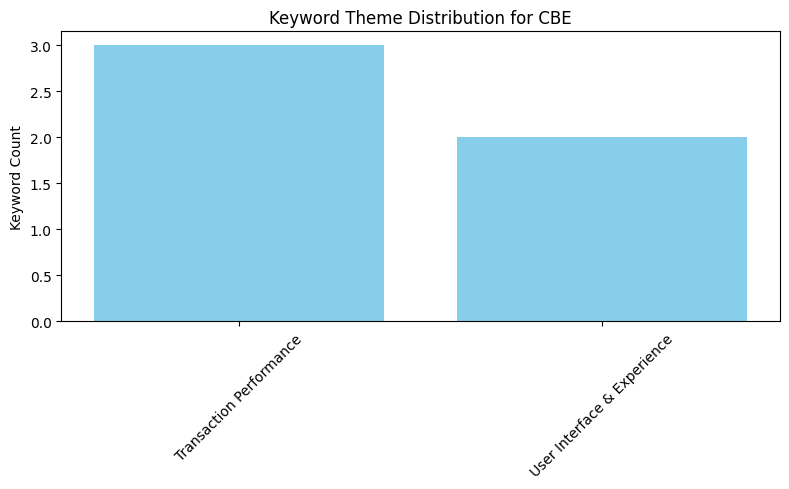


Analyzing themes for BOA...


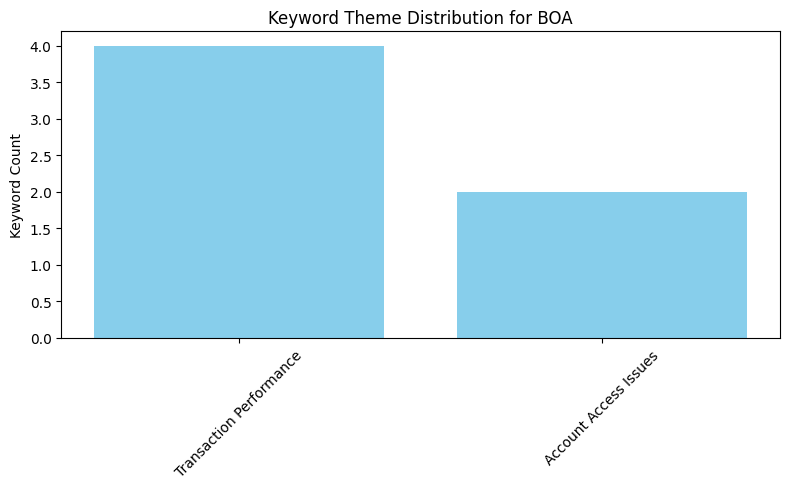


Analyzing themes for Dashen...


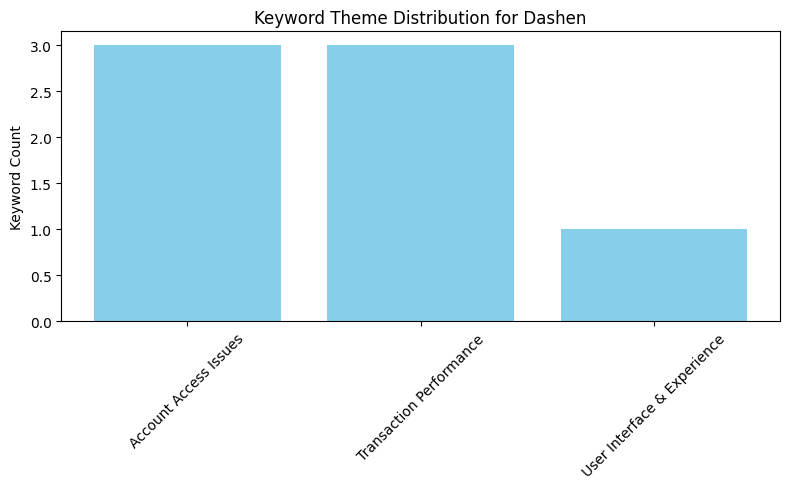

In [21]:

# --- Define Thematic Clustering Function ---
def extract_keywords_tfidf(reviews, max_features=100):
    tfidf = TfidfVectorizer(stop_words='english', max_features=max_features, ngram_range=(1,2))
    tfidf_matrix = tfidf.fit_transform(reviews)
    feature_names = tfidf.get_feature_names_out()
    summed_tfidf = tfidf_matrix.sum(axis=0)
    keywords = [(feature_names[i], summed_tfidf[0, i]) for i in range(len(feature_names))]
    keywords = sorted(keywords, key=lambda x: x[1], reverse=True)
    return keywords

def assign_to_themes(keywords):
    themes = {
        'Account Access Issues': ['login', 'otp', 'password', 'authentication', 'verification'],
        'Transaction Performance': ['transfer', 'delay', 'fail', 'loading', 'transaction', 'balance'],
        'User Interface & Experience': ['design', 'ui', 'layout', 'navigation', 'friendly'],
        'Customer Support': ['support', 'response', 'contact', 'help'],
        'Feature Requests': ['fingerprint', 'biometric', 'dark mode', 'statement', 'add option']
    }

    theme_mapping = defaultdict(list)
    for word, score in keywords:
        for theme, terms in themes.items():
            if any(term in word for term in terms):
                theme_mapping[theme].append((word, score))
                break
    return theme_mapping

def plot_themes(theme_mapping, bank_name):
    theme_counts = {theme: len(words) for theme, words in theme_mapping.items()}
    plt.figure(figsize=(8, 5))
    plt.bar(theme_counts.keys(), theme_counts.values(), color='skyblue')
    plt.title(f"Keyword Theme Distribution for {bank_name}")
    plt.xticks(rotation=45)
    plt.ylabel("Keyword Count")
    plt.tight_layout()
    plt.show()

# --- Main Function ---
def thematic_analysis_main(filepath='../data/clean_reviews.csv'):
    df = pd.read_csv(filepath)
    df = df.dropna(subset=['review'])

    banks = df['bank'].unique()
    all_theme_results = {}

    for bank in banks:
        print(f"\nAnalyzing themes for {bank}...")
        bank_reviews = df[df['bank'] == bank]['review'].tolist()
        keywords = extract_keywords_tfidf(bank_reviews)
        theme_mapping = assign_to_themes(keywords)
        all_theme_results[bank] = theme_mapping
        plot_themes(theme_mapping, bank)

    return all_theme_results

# --- Run if main ---
if __name__ == "__main__":
    thematic_results = thematic_analysis_main()